# BASALT 2022 Explore Depth and ColorMaps

## Background
I am working on potential solutions for https://www.aicrowd.com/challenges/neurips-2022-minerl-basalt-competition. A notebook visualization of a Malmo dataset I generated for training data to feed into BlockSegmentator.py and DepthEstimator.py. Lots of visuals, tables, and pretty pictures.

## Data Mining
In order to get the data for this, I configured a Malmo agent to run around a random Malmo Gym environment while it collected both Image, Depth, and ColorMap data.


## Code

### Imports

In [1]:
import PIL.Image
import numpy as np
import pandas as pd
import os
from tqdm.notebook import tqdm
from IPython.display import Image
import json
import requests
import shutil

In [2]:
path = "/Volumes/Extreme SSD/Extra Datasets/video-depth-colormap/"
frames = {"RGB": [], "Depth": [], "ColorMap": []}
for run in os.listdir(path):
    if '.csv' not in run:
        newPath = path + run + "/"
        for index in range(0, len(os.listdir(newPath + "video_frames/")[20:40])):
            if os.path.exists(newPath + "video_frames/frame" + str(index) + ".png") and os.path.exists(newPath + "depth_frames/frame" + str(index) + ".png") and os.path.exists(newPath + "colormap_frames/frame" + str(index) + ".png"):
                frames['RGB'].append(newPath + "video_frames/frame" + str(index) + ".png")
                frames['Depth'].append(newPath + "depth_frames/frame" + str(index) + ".png")
                frames['ColorMap'].append(newPath + "colormap_frames/frame" + str(index) + ".png")
df = pd.DataFrame.from_dict(frames)
df.head()

,RGB,Depth,ColorMap
0,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...
1,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...
2,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...
3,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...
4,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...,/Volumes/Extreme SSD/Extra Datasets/video-dept...


In [3]:
video_width = 640
video_height = 360
print(len(df))

140


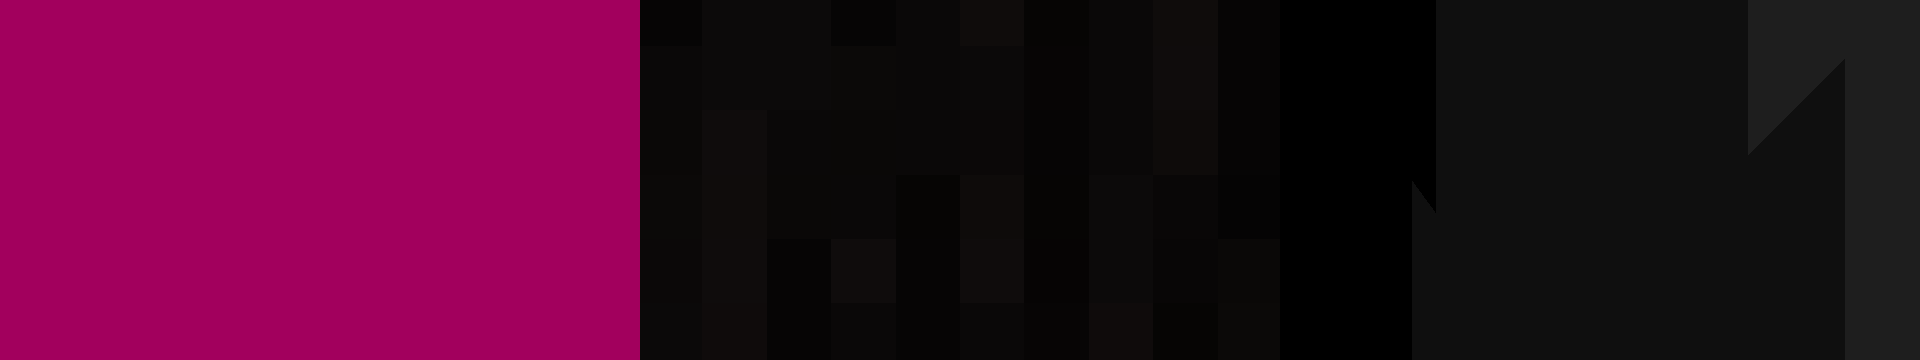

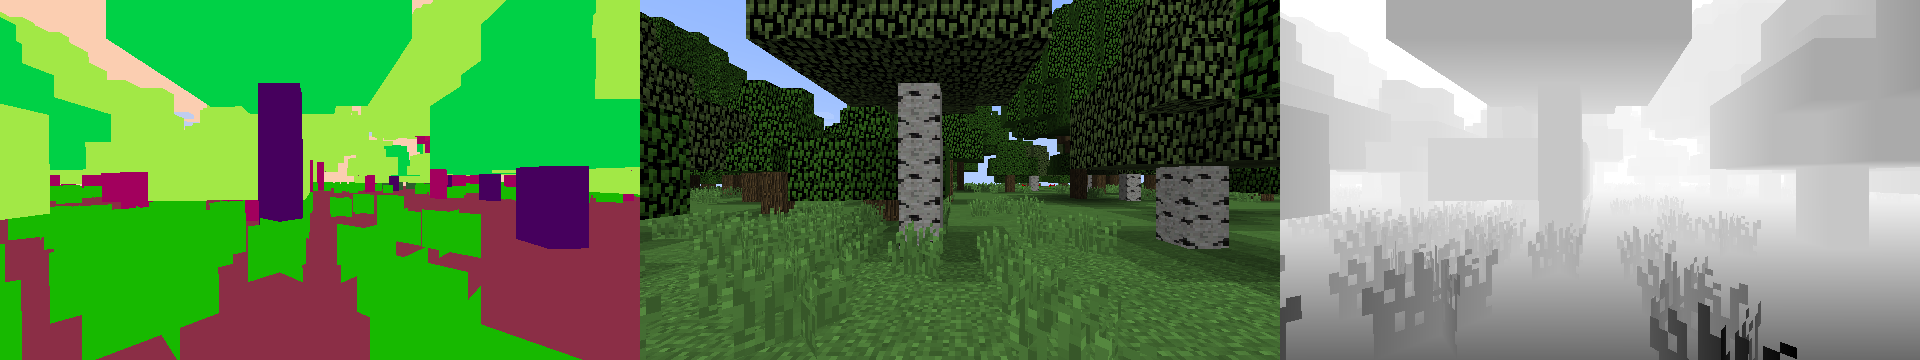

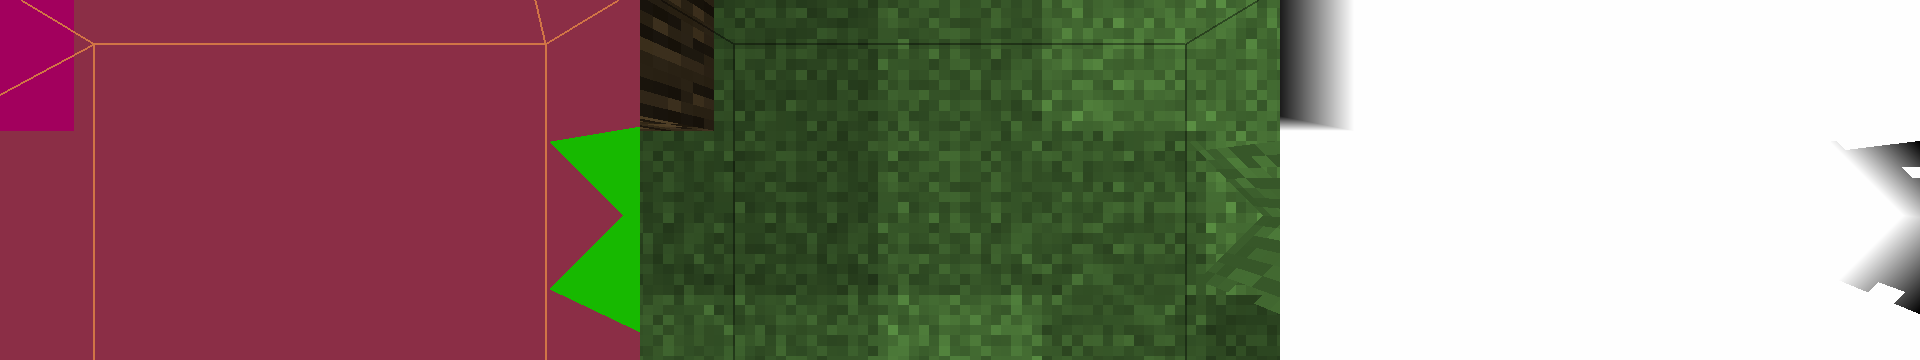

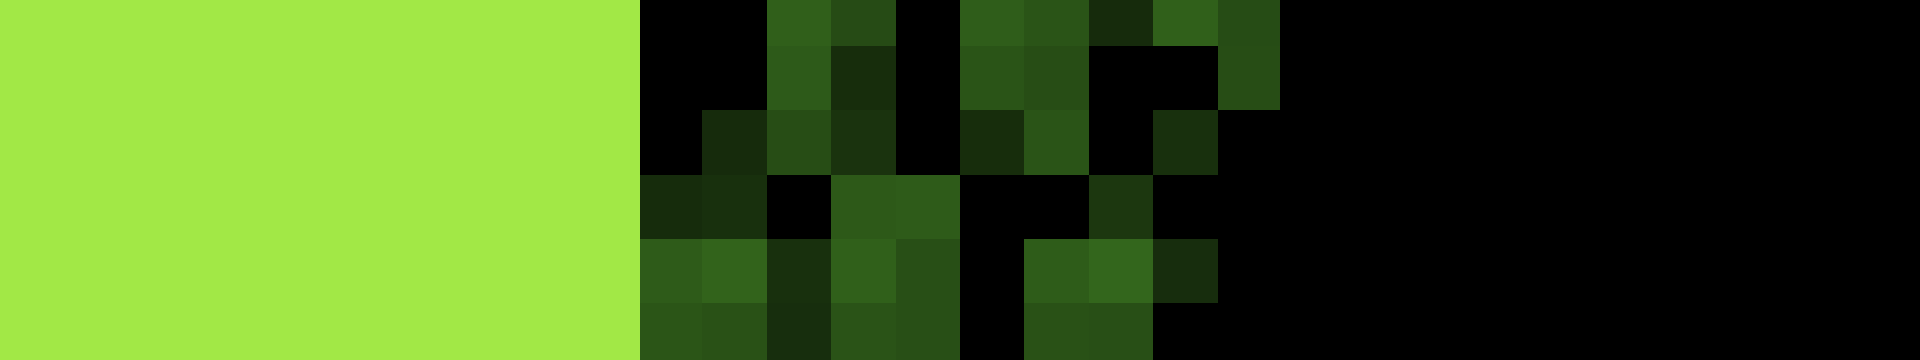

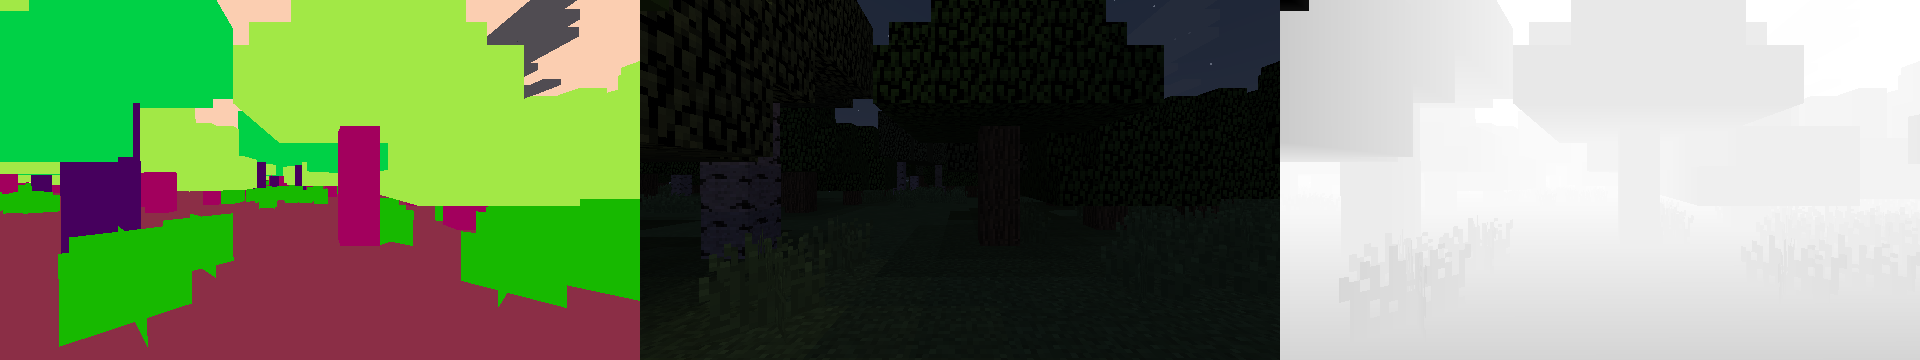

In [4]:
sample = df.sample(5)
for index, row in sample.iterrows():
    new_image = PIL.Image.new('RGB',(3*video_width, video_height), (255,255,255))
    new_image.paste(PIL.Image.open(row["ColorMap"]),(0,0))
    new_image.paste(PIL.Image.open(row["RGB"]),(video_width,0))
    new_image.paste(PIL.Image.open(row["Depth"]),(2*video_width,0))
    display(new_image)

In [5]:
uniqueColors = {}
colorsUsed = []
for index, row in tqdm(df.iterrows(), total=len(df)):
    image = PIL.Image.open(row["ColorMap"])
    imgarr = np.asarray(image)
    unique = np.unique(imgarr.reshape(-1, imgarr.shape[2]), axis=0)
    cleanUnique = []
    for color in unique:
        count = 0
        for r in range(0, video_height):
            for c in range(0, video_width):
                if imgarr[r][c][0] == color[0] and imgarr[r][c][1] == color[1] and imgarr[r][c][2] == color[2]:
                    count+=1
        if count > 2:
            cleanUnique.append(color)
                    
    colorsUsed.append(str(cleanUnique))
    for color in cleanUnique:
        key = str(color[0]) + " " + str(color[1]) + " " + str(color[2])
        if not key in uniqueColors.keys():
            uniqueColors.update({key: 1})
        else:
            uniqueColors[key]+=1
            

  0%|          | 0/140 [00:00<?, ?it/s]

In [6]:
print(len(uniqueColors))

77


In [8]:
colorDFs = []
for file in os.listdir("/Volumes/Extreme SSD/Extra Datasets/video-depth-colormap/"):
    if '.csv' in file:
        colorDFs.append(pd.read_csv(path + file))
        print(file)

colors7.csv
colors3.csv
colors2.csv
colors0.csv
colors5.csv
colors6.csv
colors1.csv
colors4.csv


In [9]:
allColors = pd.concat(colorDFs, ignore_index=True, sort=False)
allColors.head(10)

,ColorMap,"162,232,70","139,46,70","232,232,23","23,185,0","58,255,12","93,0,70","53,44,41","0,209,70","255,255,0",...,"0,255,12","69,59,61","64,54,54","68,58,59","66,56,57","31,29,35","63,53,53","65,55,57","134,255,0","23,46,139"
0,/Volumes/Extreme SSD/Extra Datasets/video-dept...,114762.0,107629.0,960.0,7049.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,/Volumes/Extreme SSD/Extra Datasets/video-dept...,95953.0,124723.0,1026.0,8698.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/Volumes/Extreme SSD/Extra Datasets/video-dept...,95944.0,124732.0,1026.0,8698.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/Volumes/Extreme SSD/Extra Datasets/video-dept...,105163.0,116368.0,993.0,7876.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/Volumes/Extreme SSD/Extra Datasets/video-dept...,96737.0,124016.0,1026.0,8621.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,/Volumes/Extreme SSD/Extra Datasets/video-dept...,95952.0,124724.0,1026.0,8698.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,/Volumes/Extreme SSD/Extra Datasets/video-dept...,95951.0,124724.0,1026.0,8699.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,/Volumes/Extreme SSD/Extra Datasets/video-dept...,95944.0,124732.0,1026.0,8698.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,/Volumes/Extreme SSD/Extra Datasets/video-dept...,106742.0,114926.0,988.0,7744.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,/Volumes/Extreme SSD/Extra Datasets/video-dept...,95953.0,124723.0,1026.0,8698.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
allColors.describe()

,"162,232,70","139,46,70","232,232,23","23,185,0","58,255,12","93,0,70","53,44,41","0,209,70","255,255,0","206,252,0",...,"0,255,12","69,59,61","64,54,54","68,58,59","66,56,57","31,29,35","63,53,53","65,55,57","134,255,0","23,46,139"
count,12303.000000,4998.000000,1778.000000,3936.000000,38.000000,2417.000000,107.000000,3858.000000,29.000000,44.00000,...,2.000000,2.000000,2.000000,3.000000,3.000000,1.0,1.0,1.0,1.0,3.000000
mean,125824.237828,70150.897759,935.181665,14153.891006,64234.184211,18730.657840,225.130841,39206.340073,187.620690,36563.50000,...,8.000000,2.500000,147.500000,8.666667,4.333333,1.0,2.0,4.0,244.0,809.333333
std,74352.446657,46868.405493,666.405199,18139.540978,71847.967006,17252.652397,660.753659,56862.809351,223.140957,49909.21943,...,9.899495,0.707107,36.062446,4.932883,2.516611,NaN,NaN,NaN,NaN,213.026602
min,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,2.000000,122.000000,3.000000,2.000000,1.0,2.0,4.0,244.0,574.000000
25%,62150.500000,30569.000000,455.000000,1712.000000,3684.500000,3777.000000,14.000000,1939.000000,45.000000,3179.50000,...,4.500000,2.250000,134.750000,7.000000,3.000000,1.0,2.0,4.0,244.0,719.500000
50%,122262.000000,62815.500000,861.000000,6953.000000,37693.000000,19423.000000,30.000000,15196.000000,87.000000,12604.00000,...,8.000000,2.500000,147.500000,11.000000,4.000000,1.0,2.0,4.0,244.0,865.000000
75%,198532.000000,106684.000000,1208.250000,19950.500000,109154.000000,26441.000000,91.500000,45092.750000,319.000000,45801.50000,...,11.500000,2.750000,160.250000,11.500000,5.500000,1.0,2.0,4.0,244.0,927.000000
max,230400.000000,212781.000000,3075.000000,114617.000000,217976.000000,109376.000000,4501.000000,230400.000000,837.000000,230400.00000,...,15.000000,3.000000,173.000000,12.000000,7.000000,1.0,2.0,4.0,244.0,989.000000


In [11]:
drop = []
for column in list(allColors):
    if not column == "ColorMap":
        if allColors[column].max() < 30000:
            drop.append(column)
allColors = allColors.drop(columns=drop)
allColors.describe()

,"162,232,70","139,46,70","23,185,0","58,255,12","93,0,70","0,209,70","206,252,0","251,206,177","56,47,46","56,47,45",...,"87,61,57","113,75,73","116,78,76","118,79,77","120,79,77","109,74,71","157,117,110","132,99,92","138,103,97","148,111,104"
count,12303.000000,4998.000000,3936.000000,38.000000,2417.000000,3858.000000,44.00000,6392.000000,219.000000,173.000000,...,1.0,1.0,2.00000,5.00000,3.000000,2.000000,2.000000,1.0,1.0,1.0
mean,125824.237828,70150.897759,14153.891006,64234.184211,18730.657840,39206.340073,36563.50000,54281.773310,2683.849315,1559.699422,...,49568.0,46364.0,40515.50000,7608.40000,23837.000000,23052.500000,19190.000000,35759.0,38677.0,39138.0
std,74352.446657,46868.405493,18139.540978,71847.967006,17252.652397,56862.809351,49909.21943,65802.544945,6198.438825,4139.861450,...,NaN,NaN,720.54181,15443.37626,16034.265777,27819.702092,26597.114468,NaN,NaN,NaN
min,3.000000,2.000000,1.000000,1.000000,4.000000,1.000000,1.00000,1.000000,1.000000,2.000000,...,49568.0,46364.0,40006.00000,290.00000,5907.000000,3381.000000,383.000000,35759.0,38677.0,39138.0
25%,62150.500000,30569.000000,1712.000000,3684.500000,3777.000000,1939.000000,3179.50000,3256.750000,74.000000,66.000000,...,49568.0,46364.0,40260.75000,386.00000,17355.500000,13216.750000,9786.500000,35759.0,38677.0,39138.0
50%,122262.000000,62815.500000,6953.000000,37693.000000,19423.000000,15196.000000,12604.00000,20548.000000,585.000000,423.000000,...,49568.0,46364.0,40515.50000,448.00000,28804.000000,23052.500000,19190.000000,35759.0,38677.0,39138.0
75%,198532.000000,106684.000000,19950.500000,109154.000000,26441.000000,45092.750000,45801.50000,87516.000000,1289.500000,1509.000000,...,49568.0,46364.0,40770.25000,1703.00000,32802.000000,32888.250000,28593.500000,35759.0,38677.0,39138.0
max,230400.000000,212781.000000,114617.000000,217976.000000,109376.000000,230400.000000,230400.00000,230400.000000,51445.000000,35745.000000,...,49568.0,46364.0,41025.00000,35215.00000,36800.000000,42724.000000,37997.000000,35759.0,38677.0,39138.0


162,232,70
201052.0


/var/folders/1v/pkj_pxz51qv0_y_c9mkb0dzh0000gn/T/ipykernel_99282/886044926.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for index, row in allColors.dropna(subset=[key])[allColors[key]>=30000].sample(3, replace=True).iterrows():


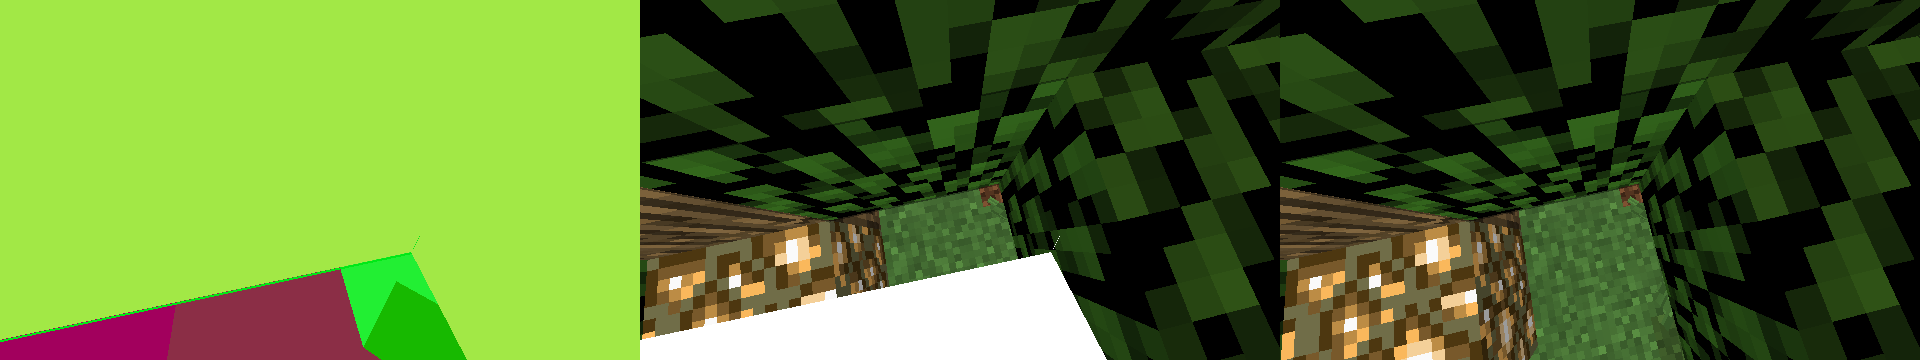

45849.0


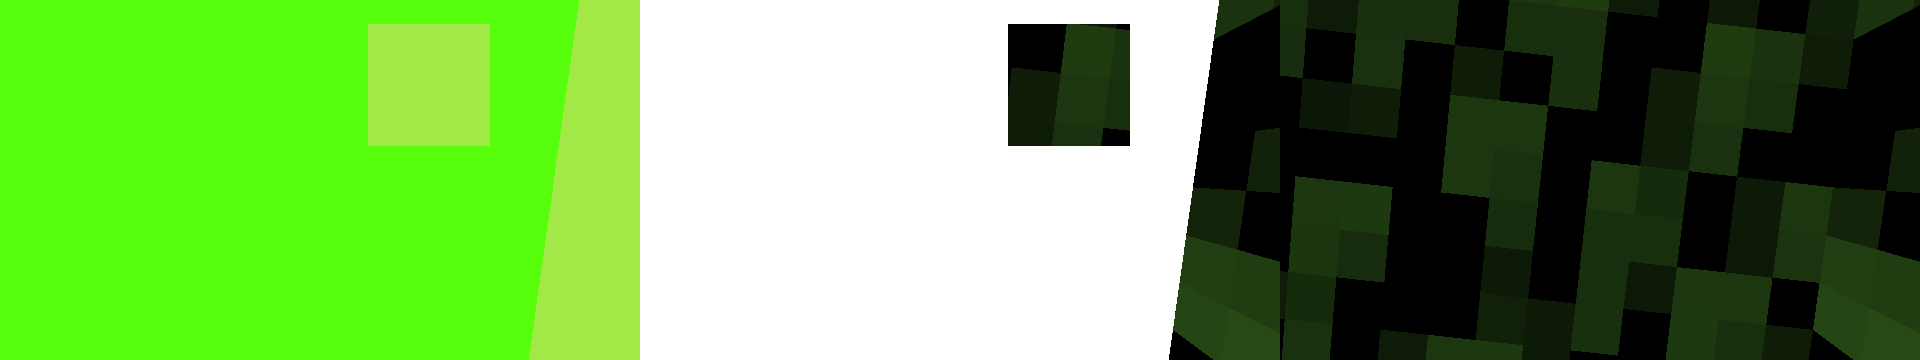

130634.0


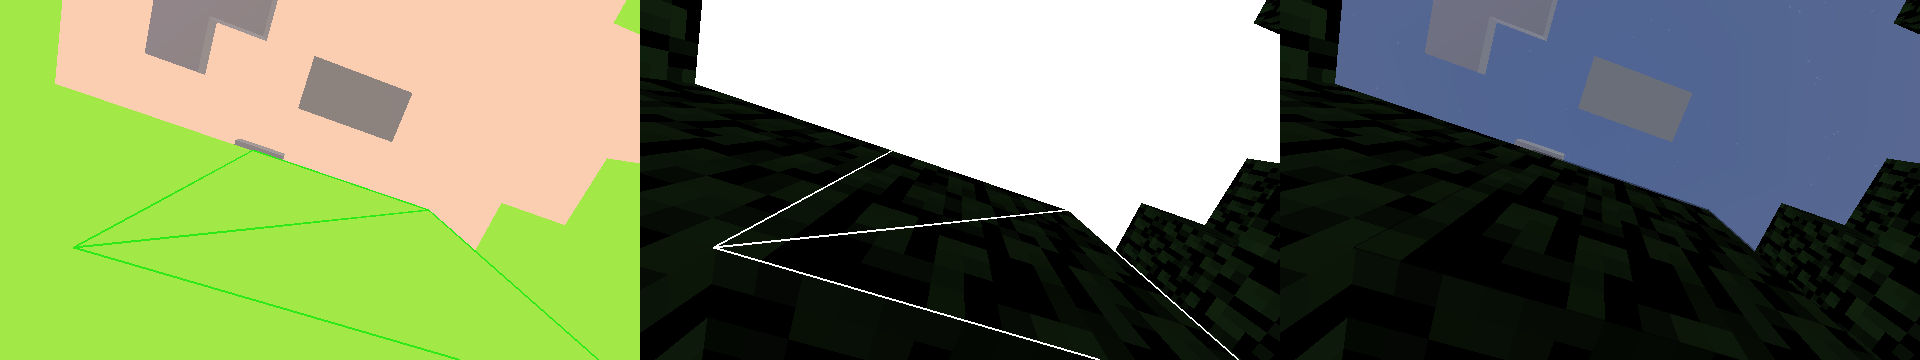

162,232,70
139,46,70
201796.0


/var/folders/1v/pkj_pxz51qv0_y_c9mkb0dzh0000gn/T/ipykernel_99282/886044926.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for index, row in allColors.dropna(subset=[key])[allColors[key]>=30000].sample(3, replace=True).iterrows():


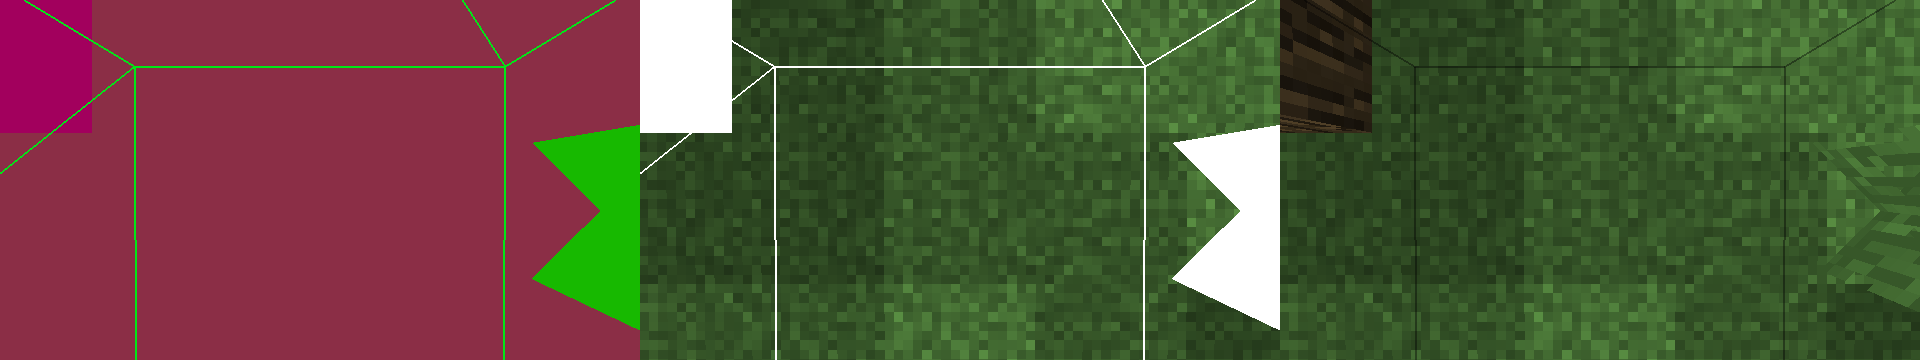

118547.0


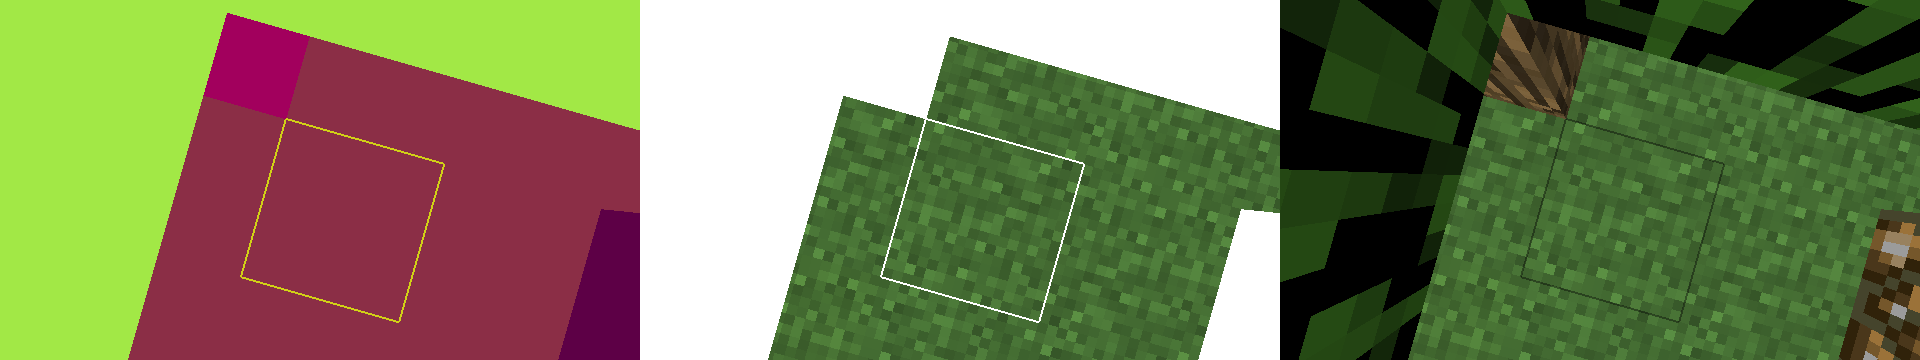

34238.0


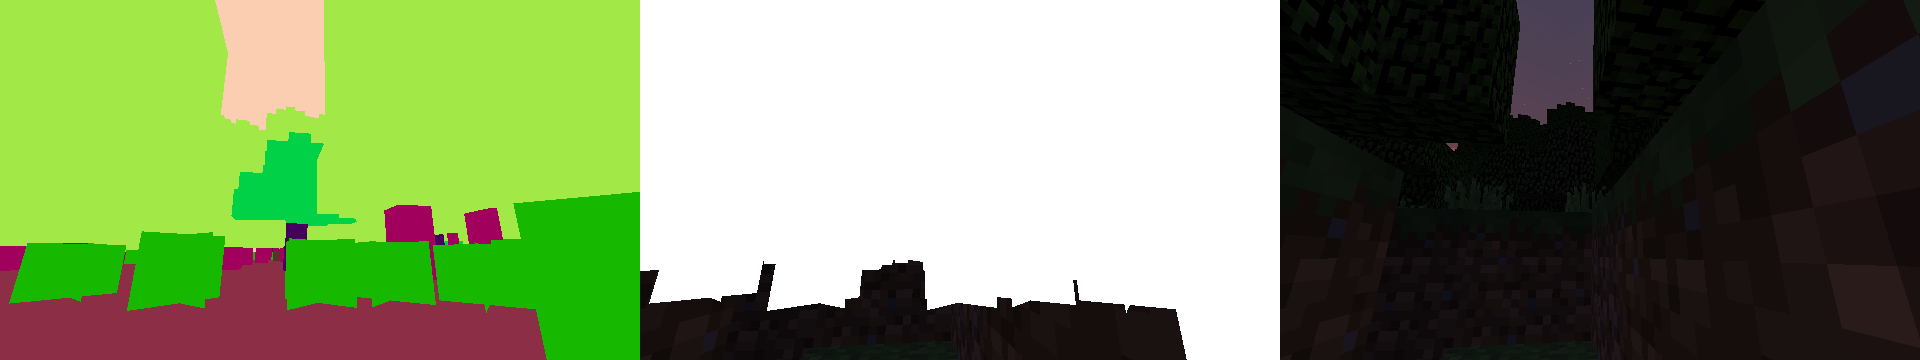

139,46,70
23,185,0
61783.0


/var/folders/1v/pkj_pxz51qv0_y_c9mkb0dzh0000gn/T/ipykernel_99282/886044926.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for index, row in allColors.dropna(subset=[key])[allColors[key]>=30000].sample(3, replace=True).iterrows():


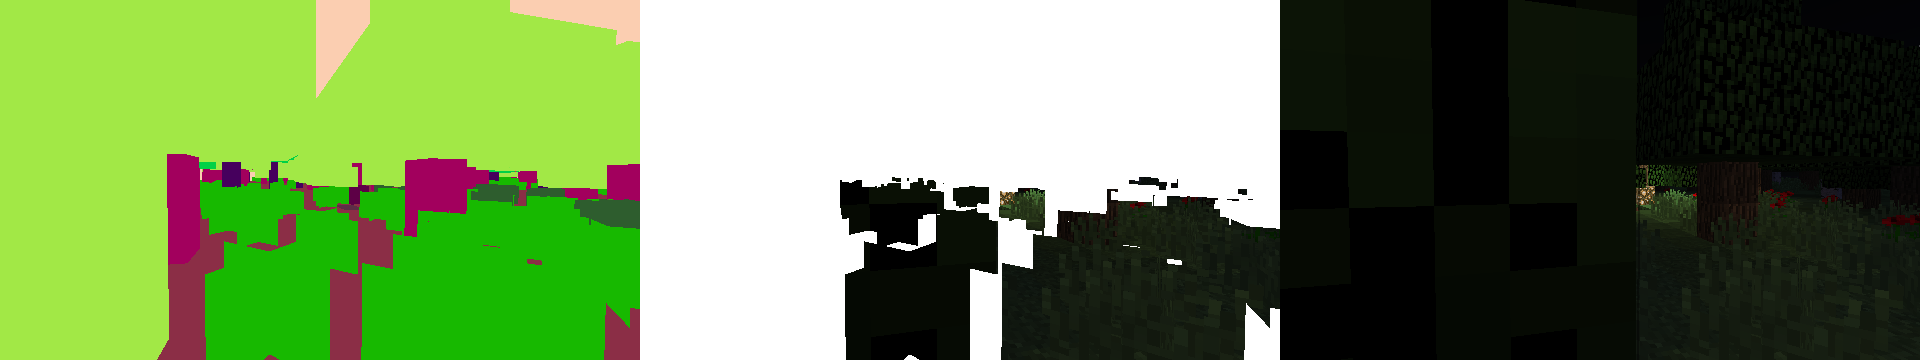

42512.0


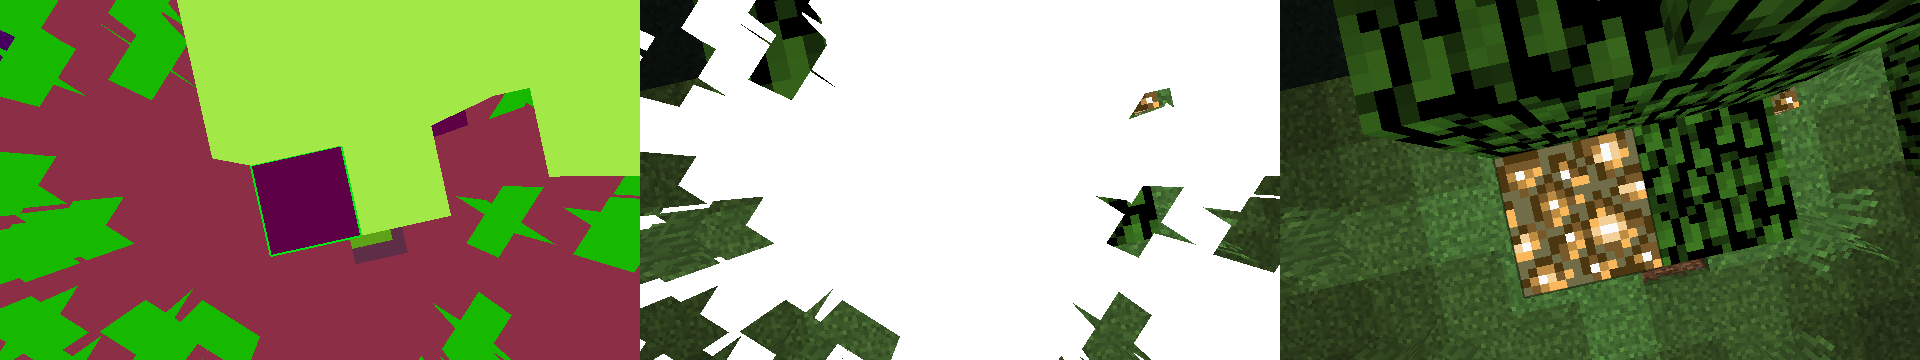

75471.0


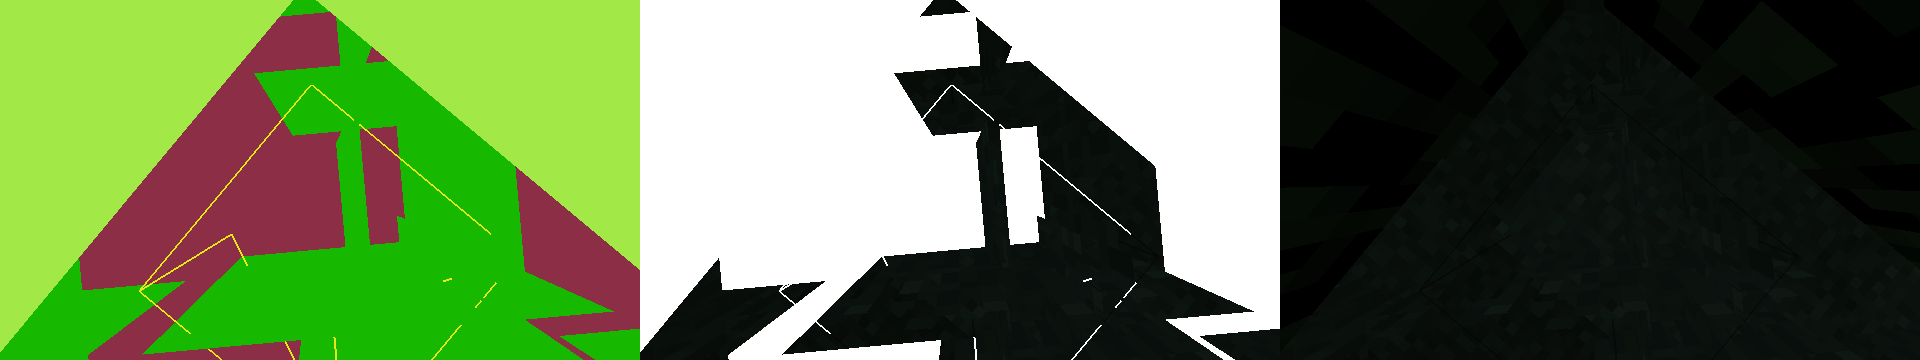

23,185,0
58,255,12
190198.0


/var/folders/1v/pkj_pxz51qv0_y_c9mkb0dzh0000gn/T/ipykernel_99282/886044926.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for index, row in allColors.dropna(subset=[key])[allColors[key]>=30000].sample(3, replace=True).iterrows():


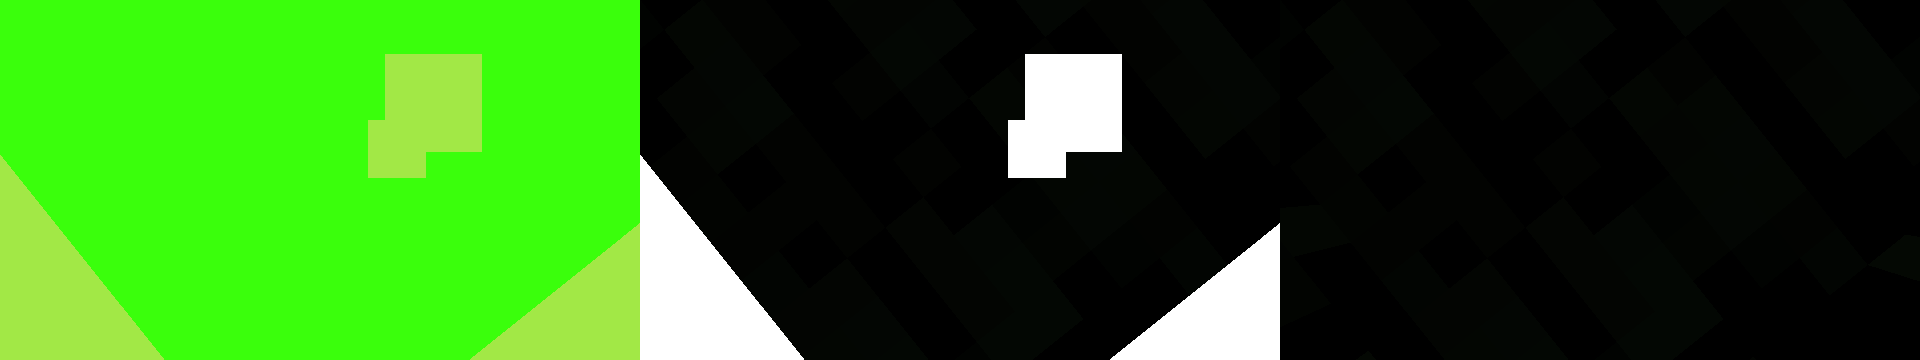

186498.0


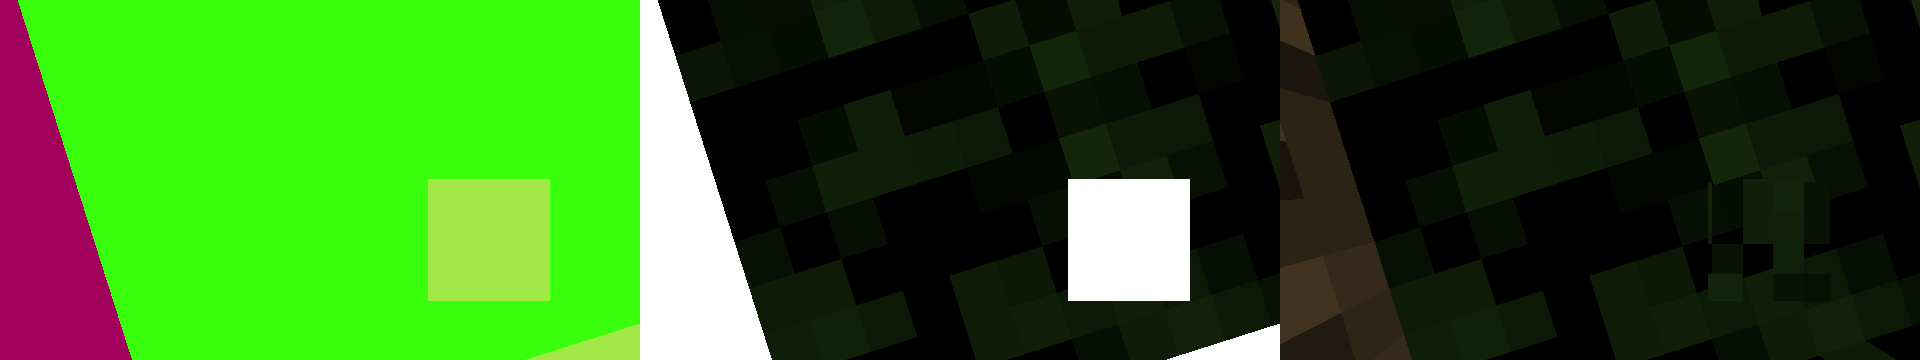

96890.0


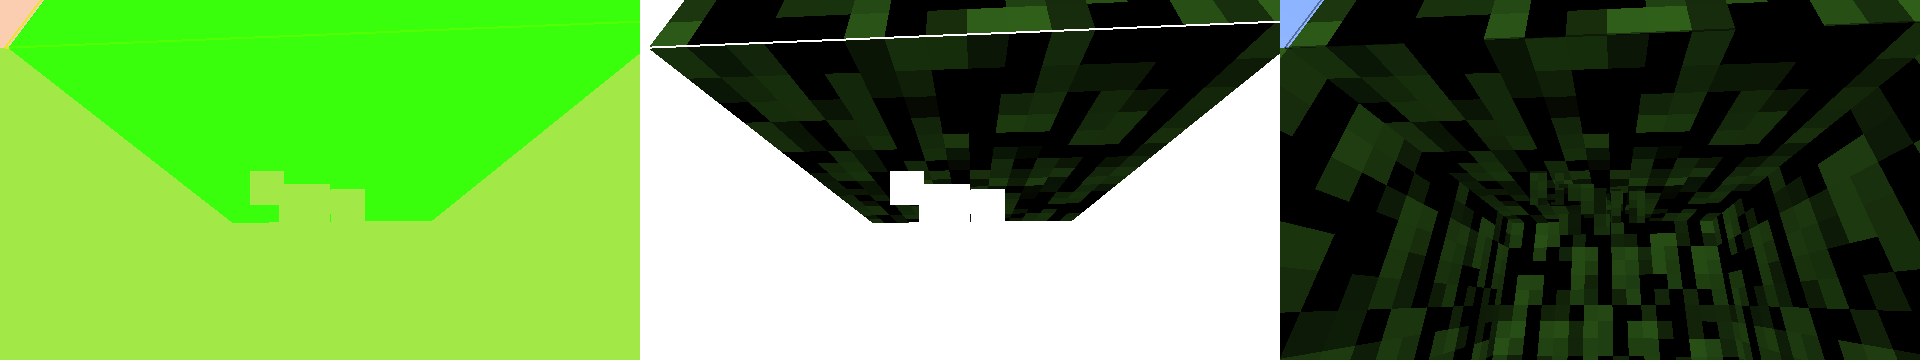

58,255,12


In [12]:
mappedColors = []
for key in list(allColors)[1:5]:
    print(key)
    for index, row in allColors.dropna(subset=[key])[allColors[key]>=30000].sample(3, replace=True).iterrows():
        print(row[key])
            
        cmArr = np.asarray(PIL.Image.open(row["ColorMap"]))
        imgArr = np.asarray(PIL.Image.open(row["ColorMap"].replace("colormap_frames", "video_frames")))
        for r in range(0, video_height):
            for c in range(0, video_width):
                if not str(cmArr[r][c][0]) + "," + str(cmArr[r][c][1]) + "," + str(cmArr[r][c][2]) == key:
                    imgArr[r][c][0] = 255
                    imgArr[r][c][1] = 255
                    imgArr[r][c][2] = 255
        new_image = PIL.Image.new('RGB',(3*video_width, video_height), (255,255,255))
        new_image.paste(PIL.Image.fromarray(cmArr, "RGB"),(0,0))
        new_image.paste(PIL.Image.fromarray(imgArr, "RGB"),(video_width,0))
        new_image.paste(PIL.Image.open(row["ColorMap"].replace("colormap_frames", "video_frames")),(2*video_width,0))
        display(new_image)
            
    print(key)